In [1]:
#uvoz knjižnic
import sympy as sym
import numpy as np
import scipy as sp 
import scipy
from scipy.signal import butter

import matplotlib.pyplot as plt
import pickle

In [2]:
#uvoz podatkov
testno = np.load('LV balansiranje-testno_stanje.npy',allow_pickle=True)
zacetno = np.load('LV balansiranje-zacetno_stanje.npy',allow_pickle=True)
testno = testno.tolist()
zacetno = zacetno.tolist()
testno_stanje = testno['data']
zacetno_stanje = zacetno['data']

#sortiranje uvoženih podatkov
A_z = zacetno_stanje[:, 0]
B_z = zacetno_stanje[:, 1]
sonda_z = zacetno_stanje[:, 2]
A_t = testno_stanje[:, 0]
B_t = testno_stanje[:, 1]
sonda_t = testno_stanje[:, 2]

# Signal iz sonde

Text(0, 0.5, 'A [/]')

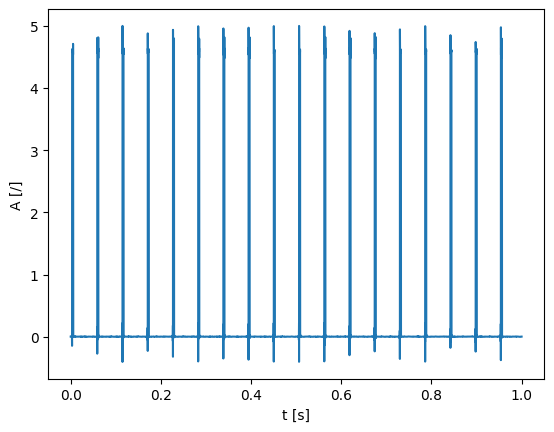

In [3]:
#začetno stanje
t = np.linspace(0,1,len(A_z))
plt.plot(t,sonda_z)
plt.xlabel('t [s]')
plt.ylabel('A [/]')

Text(0, 0.5, 'A [/]')

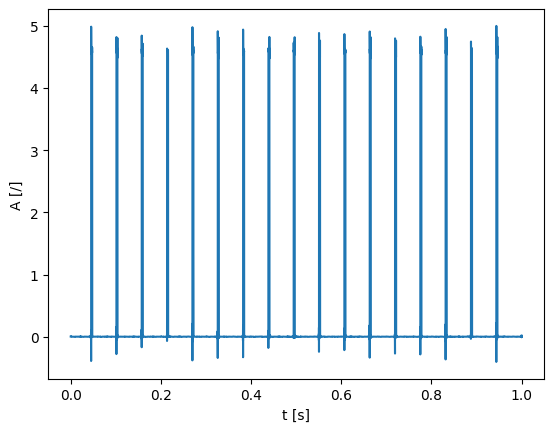

In [4]:
#testno stanje
plt.plot(t, sonda_t)
plt.xlabel('t [s]')
plt.ylabel('A [/]')

In [5]:
#frekvenca razbrana iz zgornjih dveh grafov
f_zacetna= 18 #Hz
f_testna= 17 #Hz
#določitev mej filtra
Nyq = np.size(A_z)/2
sp_z = 17.5/Nyq
zg_z = 18.5/Nyq
sp_t = 16.5/Nyq
zg_t = 17.5/Nyq

# Ležajno mesto A

## Začetno stanje 

Text(0, 0.5, 'a [m/s2]')

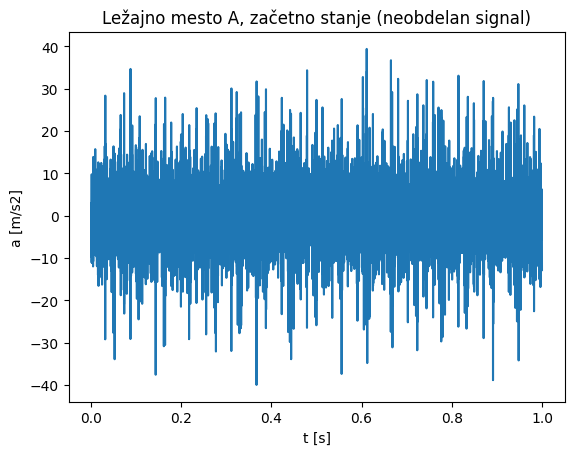

In [6]:
plt.title('Ležajno mesto A, začetno stanje (neobdelan signal)')
plt.plot(t,A_z)
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')

Text(0, 0.5, 'a [mm/s2]')

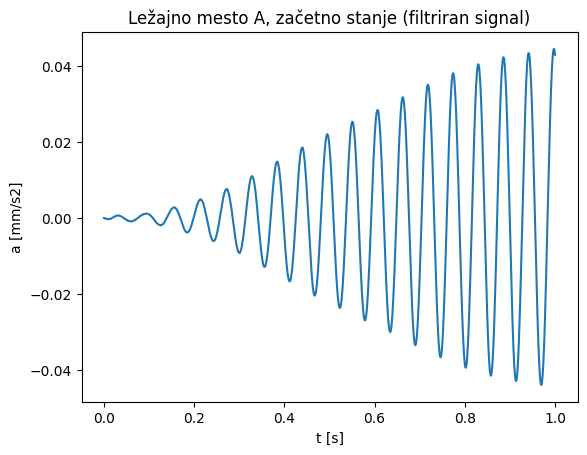

In [7]:
plt.title('Ležajno mesto A, začetno stanje (filtriran signal)')
b, a = scipy.signal.butter(2, [sp_z, zg_z], 'band')
filter_A_z = scipy.signal.lfilter(b, a, A_z)
plt.plot(t,filter_A_z)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s2]')

Text(0.5, 1.0, 'Amplitudni spekter (začetno stanje A)')

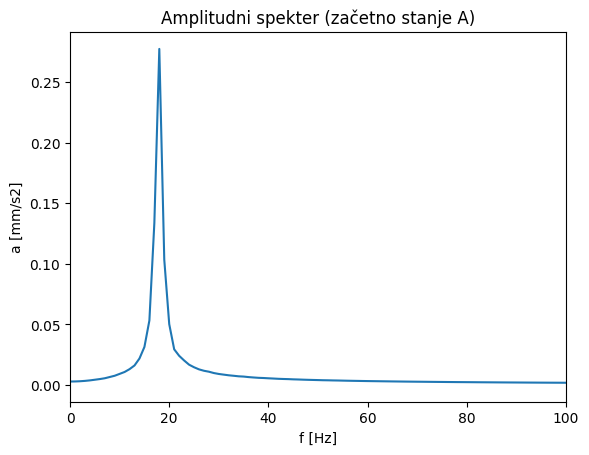

In [8]:
signal_A_z = np.fft.rfft(filter_A_z)
freq_A_z = np.fft.rfftfreq(len(A_z), 1/25600)
plt.plot(freq_A_z,np.abs(signal_A_z/1000))
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('a [mm/s2]')
plt.title('Amplitudni spekter (začetno stanje A)')

Text(0.5, 1.0, 'Fazni spekter (začetno stanje A)')

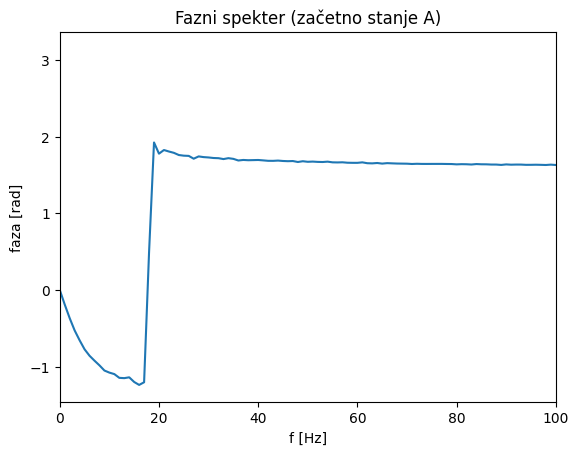

In [9]:
faza_A_z = np.angle(signal_A_z/1000)
plt.plot(freq_A_z,faza_A_z)
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('faza [rad]')
plt.title('Fazni spekter (začetno stanje A)')

In [10]:
A_ua = max(np.abs(signal_A_z/1000)[0:100:1])
fi_ua = faza_A_z[18]
A_ua, fi_ua

(0.27728219224016204, 0.4907158027650339)

In [11]:
np.rad2deg(fi_ua)

28.115944438810576

## Testno stanje 

Text(0, 0.5, 'a [mm/s2]')

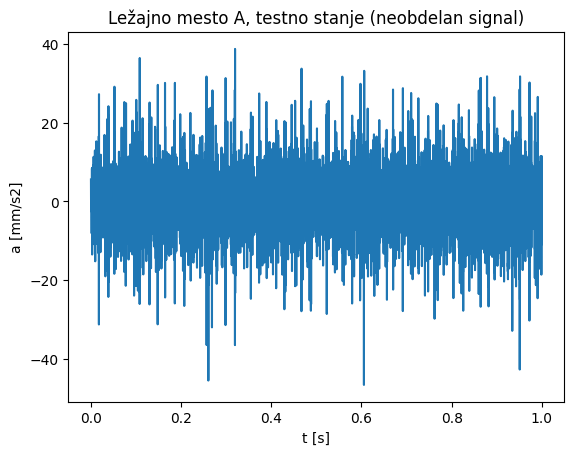

In [12]:
plt.title('Ležajno mesto A, testno stanje (neobdelan signal)')
plt.plot(t,A_t)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s2]')

Text(0, 0.5, 'a [mm/s2]')

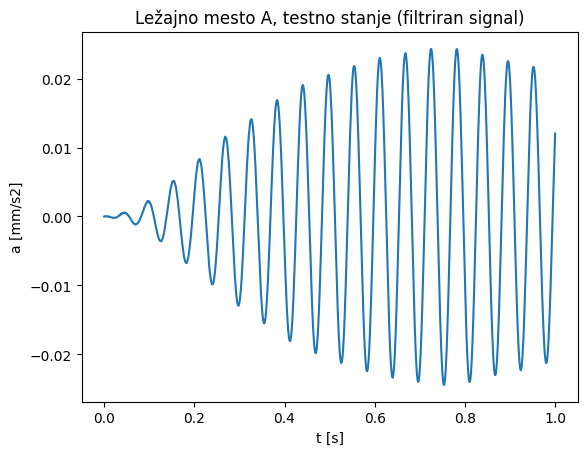

In [13]:
plt.title('Ležajno mesto A, testno stanje (filtriran signal)')
b, a = scipy.signal.butter(2, [sp_t, zg_t], 'band')
filter_A_t = scipy.signal.lfilter(b, a, A_t)
plt.plot(t,filter_A_t)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s2]')

Text(0.5, 1.0, 'Amplitudni spekter (testno stanje A)')

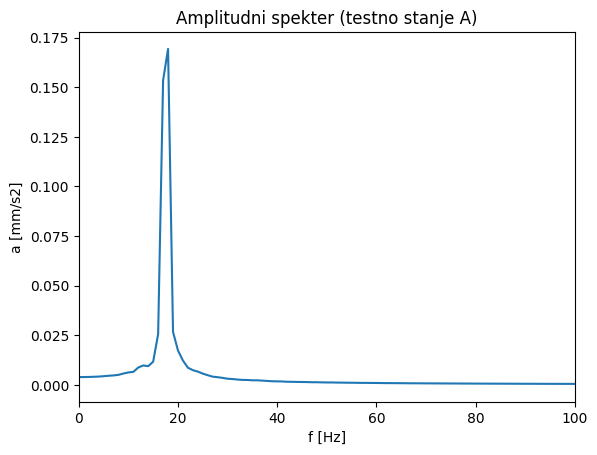

In [14]:
signal_A_t = np.fft.rfft(filter_A_t)
freq_A_t = np.fft.rfftfreq(len(A_t), 1/25600)
plt.plot(freq_A_t,np.abs(signal_A_t/1000))
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('a [mm/s2]')
plt.title('Amplitudni spekter (testno stanje A)')

Text(0.5, 1.0, 'Fazni spekter (testno stanje A)')

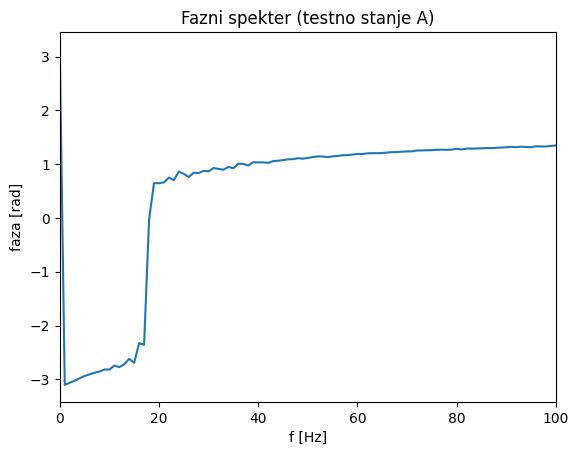

In [15]:
faza_A_t = np.angle(signal_A_t/1000)
plt.plot(freq_A_t,faza_A_t)
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('faza [rad]')
plt.title('Fazni spekter (testno stanje A)')

In [16]:
A_uwa = max(np.abs(signal_A_t/1000)[0:100:1])
fi_uwa = faza_A_t[18]
A_uwa, fi_uwa

(0.16929454310183945, -0.030078943963615743)

In [17]:
np.rad2deg(fi_uwa)

-1.7233965413256862

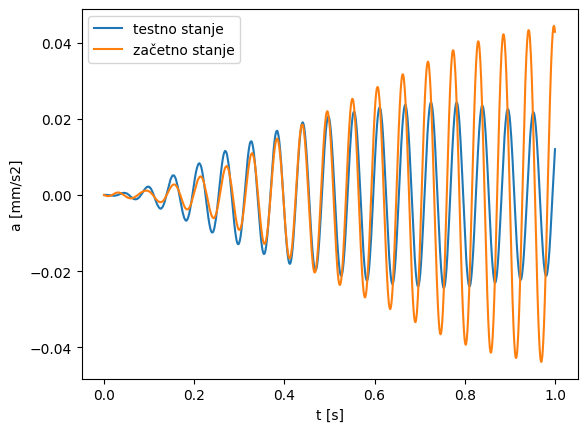

In [28]:
plt.plot(t,filter_A_t, label = "testno stanje")
plt.plot(t,filter_A_z,  label = "začetno stanje")
plt.xlabel('t [s]')
plt.ylabel('a [mm/s2]')
plt.legend()

## Izračun kota in korekcijske mase, A:

In [18]:
AzA = A_ua*np.cos(fi_ua) + 1j*A_ua*np.sin(fi_ua)
AtA = A_uwa*np.cos(fi_uwa) + 1j*A_uwa*np.sin(fi_uwa)
Q_A = -AzA/(AtA-AzA)
mk_A = abs(Q_A)*2.8
fik_A = np.arctan(Q_A.imag/Q_A.real)
mk_A, fik_A

(5.000318702192862, -0.5734322576605043)

In [19]:
np.rad2deg(fik_A)

-32.85524820060527

# Ležajno mesto B

## Začetno stanje

In [20]:
b, a = scipy.signal.butter(2, [sp_z, zg_z], 'band')
filter_B_z = scipy.signal.lfilter(b, a, B_z)
signal_B_z = np.fft.rfft(filter_B_z)
freq_B_z = np.fft.rfftfreq(len(B_z), 1/25600)
faza_B_z = np.angle(signal_B_z/1000)

In [21]:
A_ub = max(np.abs(signal_B_z/1000)[0:100:1])
fi_ub = faza_B_z[18]
A_ub, fi_ub

(0.34579386657566236, 0.21079472169754213)

## Testno stanje

In [22]:
b, a = scipy.signal.butter(2, [sp_t, zg_t], 'band')
filter_B_t = scipy.signal.lfilter(b, a, B_t)
signal_B_t = np.fft.rfft(filter_B_t)
freq_B_t = np.fft.rfftfreq(len(B_t), 1/25600)
faza_B_t = np.angle(signal_B_t/1000)

In [23]:
A_uwb = max(np.abs(signal_B_t/1000)[0:100:1])
fi_uwb = faza_B_t[18]
A_uwb, fi_uwb

(0.158593895019381, -0.1052802707235551)

## Izračun kota in korekcijske mase, B:

In [24]:
AzB = A_ub*np.cos(fi_ub) + 1j*A_ub*np.sin(fi_ub)
AtB = A_uwb*np.cos(fi_uwb) + 1j*A_uwb*np.sin(fi_uwb)
Q_B = -AzB/(AtB-AzB)
mk_B = abs(Q_B)*2.8
fik_B = np.arctan(Q_B.imag/Q_B.real)
mk_B, fik_B

(4.812495659700866, -0.24754882654415966)

In [25]:
np.rad2deg(fik_B)

-14.183502984396432